In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
from statsmodels.formula.api import ols
# from statsmodels.formula.api import 
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

# Problem 2

## 2.1

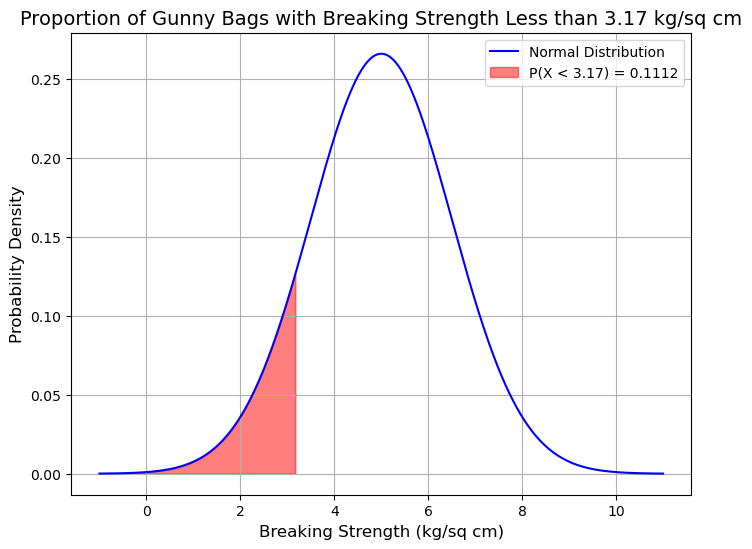

In [590]:

# Given parameters
mean = 5  # mean (mu)
std_dev = 1.5  # standard deviation (sigma)

# Breaking strength value for the specific case
x_value = 3.17

# Create a range of values for the x-axis (breaking strength)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the normal distribution (PDF)
pdf = norm.pdf(x, mean, std_dev)

# Calculate the cumulative distribution (CDF) at x_value
cdf_value = norm.cdf(x_value, mean, std_dev)

# Plot the normal distribution curve
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="Normal Distribution", color='blue')

# Shade the area where the breaking strength is less than 3.17 kg per sq cm
x_fill = np.linspace(mean - 4*std_dev, x_value, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, mean, std_dev), color='red', alpha=0.5, label=f'P(X < {x_value}) = {cdf_value:.4f}')

# Add titles and labels
plt.title(f"Proportion of Gunny Bags with Breaking Strength Less than {x_value} kg/sq cm", fontsize=14)
plt.xlabel("Breaking Strength (kg/sq cm)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('Downloads/1.jpg')


## 2.2

0.8247


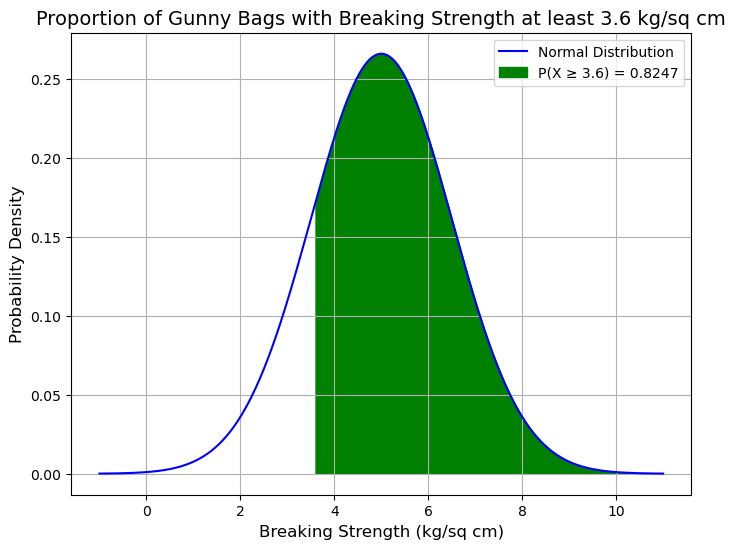

In [592]:

# 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm?
x_2_2 = 3.6
cdf_2_2 = norm.cdf(x_2_2, mean, std_dev)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="Normal Distribution", color='blue')
x_fill_2_2 = np.linspace(x_2_2, mean + 4*std_dev, 100)
plt.fill_between(x_fill_2_2, norm.pdf(x_fill_2_2, mean, std_dev), color='green',label=f'P(X ≥ {x_2_2}) = {1 - cdf_2_2:.4f}')
plt.title(f"Proportion of Gunny Bags with Breaking Strength at least {x_2_2} kg/sq cm", fontsize=14)
plt.xlabel("Breaking Strength (kg/sq cm)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('Downloads/2.jpg')
print(f'{1 - cdf_2_2:.4f}')

## 2.3

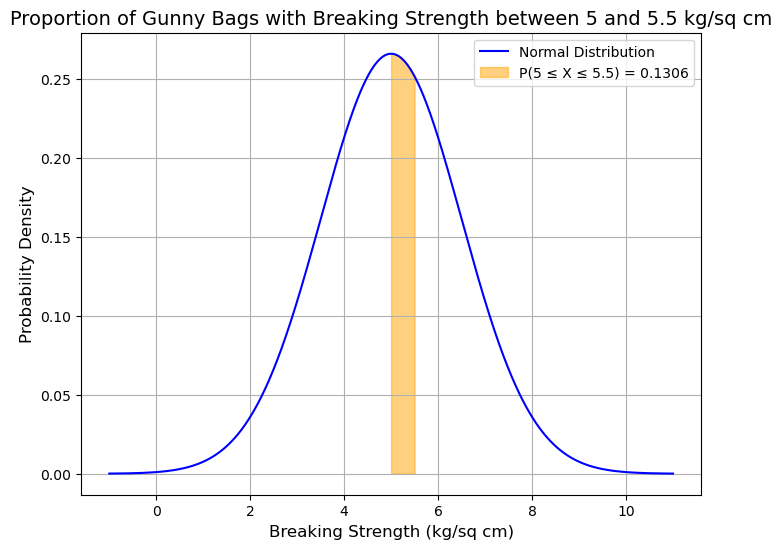

In [594]:
# 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm?
x_2_3_start = 5
x_2_3_end = 5.5
cdf_2_3_start = norm.cdf(x_2_3_start, mean, std_dev)
cdf_2_3_end = norm.cdf(x_2_3_end, mean, std_dev)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="Normal Distribution", color='blue')
x_fill_2_3 = np.linspace(x_2_3_start, x_2_3_end, 100)
plt.fill_between(x_fill_2_3, norm.pdf(x_fill_2_3, mean, std_dev), color='orange', alpha=0.5, label=f'P({x_2_3_start} ≤ X ≤ {x_2_3_end}) = {cdf_2_3_end - cdf_2_3_start:.4f}')
plt.title(f"Proportion of Gunny Bags with Breaking Strength between {x_2_3_start} and {x_2_3_end} kg/sq cm", fontsize=14)
plt.xlabel("Breaking Strength (kg/sq cm)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(loc='upper right')

plt.grid(True)
plt.savefig('Downloads/3.jpg')

## 2.4

0.13900157199868257


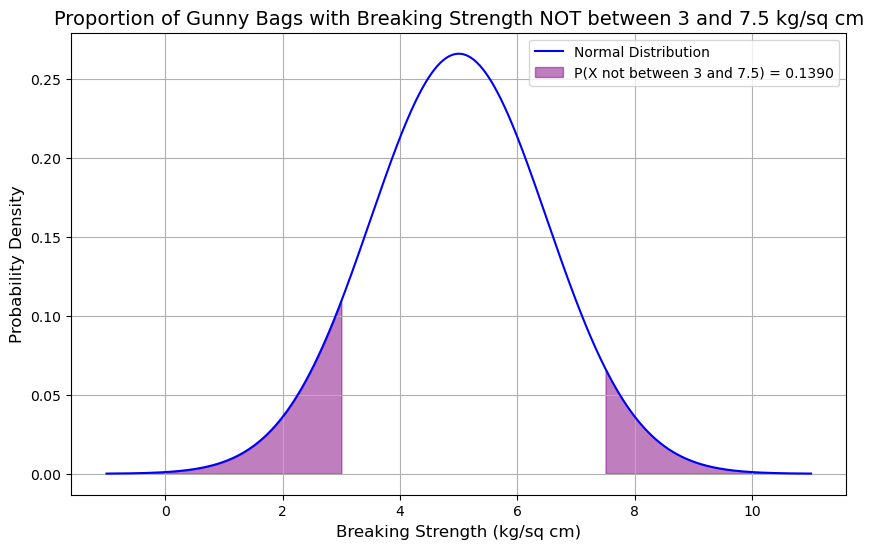

In [596]:
# 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm?
x_2_4_start = 3
x_2_4_end = 7.5
cdf_2_4_start = norm.cdf(x_2_4_start, mean, std_dev)
cdf_2_4_end = norm.cdf(x_2_4_end, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Normal Distribution", color='blue')
x_fill_left = np.linspace(mean - 4*std_dev, x_2_4_start, 100)
x_fill_right = np.linspace(x_2_4_end, mean + 4*std_dev, 100)
plt.fill_between(x_fill_left, norm.pdf(x_fill_left, mean, std_dev), color='purple', alpha=0.5)
plt.fill_between(x_fill_right, norm.pdf(x_fill_right, mean, std_dev), color='purple', alpha=0.5, label=f'P(X not between {x_2_4_start} and {x_2_4_end}) = {1 - (cdf_2_4_end - cdf_2_4_start):.4f}')
plt.title(f"Proportion of Gunny Bags with Breaking Strength NOT between {x_2_4_start} and {x_2_4_end} kg/sq cm", fontsize=14)
plt.xlabel("Breaking Strength (kg/sq cm)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('Downloads/4.jpg')
print(1 - (cdf_2_4_end - cdf_2_4_start))

# Problem 3

In [598]:
df = pd.read_csv("D:\Data Science\Module-2\Zingaro_Company.csv")
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\277665143.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Data Science\Module-2\Zingaro_Company.csv")


,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
5,161.820120,167.086582
6,149.455054,152.699641
7,135.714317,138.648766
8,102.004519,163.384427
9,89.482158,132.141726


In [599]:
df.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

In [600]:
df.shape

(75, 2)

In [601]:
df['Unpolished '].mean()

134.11052653373332

In [602]:
from scipy.stats import ttest_1samp
t_stat, p_value=ttest_1samp(df['Unpolished '],popmean=150,alternative='less')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Unpolished stones may not be suitable for printing.\n")
else:
    print("Fail to reject the null hypothesis: Unpolished stones are suitable for printing.\n")

T-statistic: -4.164629601426757, P-value: 4.171286997419652e-05
Reject the null hypothesis: Unpolished stones may not be suitable for printing.



In [603]:
df['Unpolished '].std()

33.0418044136061

In [604]:
df['Treated and Polished'].std()

15.587355273119856

In [605]:
from scipy.stats import ttest_ind
t_stat, p_value=ttest_ind(df['Unpolished '],df['Treated and Polished'],equal_var=False,alternative='two-sided')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Unpolished stones may not be suitable for printing.\n")
else:
    print("Fail to reject the null hypothesis: Unpolished stones are suitable for printing.\n")

T-statistic: -3.242232050141406, P-value: 0.001588379295584306
Reject the null hypothesis: Unpolished stones may not be suitable for printing.



# Problem 4

In [607]:
df = pd.read_excel("D:\Data Science\Module-2\Dental+Hardness+data.xlsx")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\187489031.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel("D:\Data Science\Module-2\Dental+Hardness+data.xlsx")


,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [608]:
df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [610]:
df.columns

Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response'], dtype='object')

In [611]:
df['Dentist'] = pd.Categorical(df['Dentist'])
df['Method'] = pd.Categorical(df['Method'])
df['Alloy'] = pd.Categorical(df['Alloy'])
df['Temp'] = pd.Categorical(df['Temp'])

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


**The dtype is changed to category which helps in performing anova test**

In [614]:
df['Dentist'].value_counts()

Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64

In [615]:
df['Alloy'].value_counts()

Alloy
1    45
2    45
Name: count, dtype: int64

In [616]:
df['Temp'].value_counts()

Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64

## 4.1

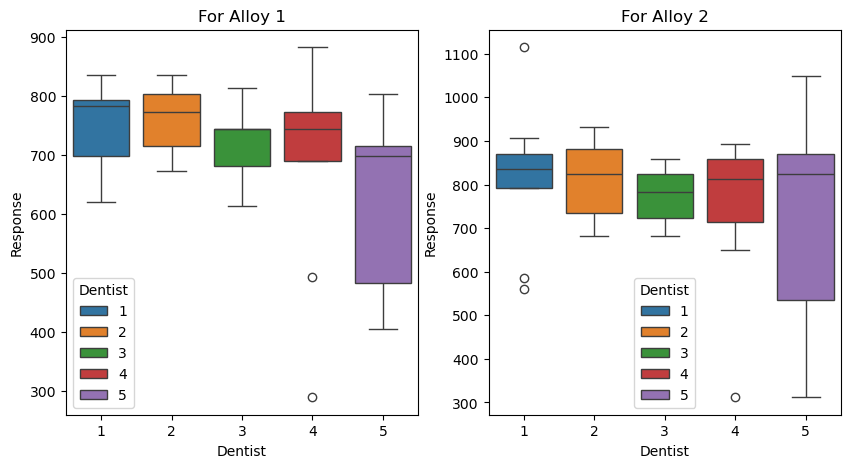

In [618]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=alloy_1,x='Dentist',y='Response',hue='Dentist')
plt.title('For Alloy 1')
plt.subplot(122)
sns.boxplot(data=alloy_2,x='Dentist',y='Response',hue='Dentist')
plt.title('For Alloy 2')

plt.savefig('Downloads/5.jpg')


In [619]:
df.shape

(90, 5)

In [620]:
from scipy.stats import shapiro

# List of alloys and dentists to iterate over
alloys = [1, 2]
dentists = [1, 2, 3, 4, 5] 

# Loop through each combination of alloy and dentist
for alloy in alloys:
    for dentist in dentists:
        subset = df[(df['Alloy'] == alloy) & (df['Dentist'] == dentist)]
        test_result = shapiro(subset['Response'])
        print(f"Shapiro Test for Alloy {alloy}, Dentist {dentist}: {test_result}")


Shapiro Test for Alloy 1, Dentist 1: ShapiroResult(statistic=0.9113543810870849, pvalue=0.3254693632188942)
Shapiro Test for Alloy 1, Dentist 2: ShapiroResult(statistic=0.9642461255698727, pvalue=0.841544387628862)
Shapiro Test for Alloy 1, Dentist 3: ShapiroResult(statistic=0.8721171628470361, pvalue=0.12953560483047716)
Shapiro Test for Alloy 1, Dentist 4: ShapiroResult(statistic=0.8368973736054908, pvalue=0.05333654291277101)
Shapiro Test for Alloy 1, Dentist 5: ShapiroResult(statistic=0.8534296949893417, pvalue=0.08127790851660108)
Shapiro Test for Alloy 2, Dentist 1: ShapiroResult(statistic=0.9039731107207415, pvalue=0.27593872565209243)
Shapiro Test for Alloy 2, Dentist 2: ShapiroResult(statistic=0.9392002455609169, pvalue=0.5735055333426523)
Shapiro Test for Alloy 2, Dentist 3: ShapiroResult(statistic=0.9340972440694506, pvalue=0.5213087304159562)
Shapiro Test for Alloy 2, Dentist 4: ShapiroResult(statistic=0.7613220140650097, pvalue=0.007332685121063265)
Shapiro Test for Alloy 

In [621]:
from scipy.stats import levene
print(levene(*[alloy_1['Response'][alloy_1['Dentist'] == i] for i in range(1, 6)])) #the * operator effectively "spreads out" the elements of the list as individual arguments
print(levene(*[alloy_2['Response'][alloy_2['Dentist'] == i] for i in range(1, 6)]))
print(len(df['Dentist'].unique()))

LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)
LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)
5


In [623]:
formula = 'Response ~ C(Dentist)'
model=ols(formula,alloy_1).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,1.977112,0.116567
Residual,40.0,539593.555556,13489.838889,NaN,NaN


In [624]:
formula = 'Response ~ C(Dentist)'
model=ols(formula,alloy_2).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,5.679791e+04,14199.477778,0.524835,0.718031
Residual,40.0,1.082205e+06,27055.122222,NaN,NaN


In [625]:
#It doesn't differ so we don't require to perform Tukey HSD Test.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(alloy_1['Response'], groups=alloy_1['Dentist'], alpha=0.05)
print(tukey_results)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   11.3333 0.9996 -145.0423  167.709  False
     1      3  -32.3333 0.9757  -188.709 124.0423  False
     1      4  -68.7778 0.7189 -225.1535  87.5979  False
     1      5 -122.2222 0.1889 -278.5979  34.1535  False
     2      3  -43.6667 0.9298 -200.0423  112.709  False
     2      4  -80.1111 0.5916 -236.4868  76.2646  False
     2      5 -133.5556 0.1258 -289.9312  22.8201  False
     3      4  -36.4444 0.9626 -192.8201 119.9312  False
     3      5  -89.8889 0.4805 -246.2646  66.4868  False
     4      5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------------


## 4.2

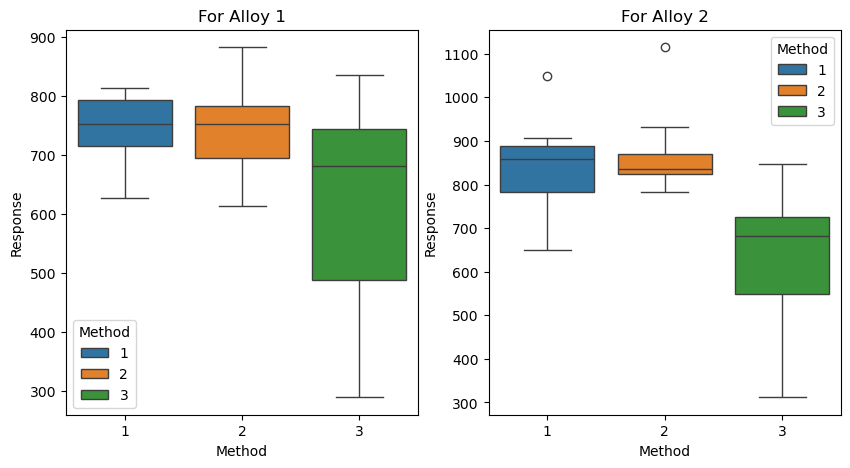

In [627]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=alloy_1,x='Method',y='Response',hue='Method')
plt.title('For Alloy 1')
plt.subplot(122)
sns.boxplot(data=alloy_2,x='Method',y='Response',hue='Method')
plt.title('For Alloy 2')

plt.savefig('Downloads/6.jpg')


In [691]:
from scipy.stats import shapiro

# List of alloys and methods to iterate over
alloys = [1, 2]
methods = [1, 2, 3]

# Loop through each combination of alloy and method
for alloy in alloys:
    for method in methods:
        subset = df[(df['Alloy'] == alloy) & (df['Method'] == method)]
        test_result = shapiro(subset['Response'])
        print(f"Shapiro Test for Alloy {alloy}, Method {method}: {test_result}")


Shapiro Test for Alloy 1, Method 1: ShapiroResult(statistic=0.9183823715698519, pvalue=0.1819861143797435)
Shapiro Test for Alloy 1, Method 2: ShapiroResult(statistic=0.973258551140558, pvalue=0.9030333961962251)
Shapiro Test for Alloy 1, Method 3: ShapiroResult(statistic=0.9114550814979346, pvalue=0.14254827970120204)
Shapiro Test for Alloy 2, Method 1: ShapiroResult(statistic=0.9638104999897447, pvalue=0.758239031460697)
Shapiro Test for Alloy 2, Method 2: ShapiroResult(statistic=0.7557931279282883, pvalue=0.001051113443000027)
Shapiro Test for Alloy 2, Method 3: ShapiroResult(statistic=0.9021322839255671, pvalue=0.10259048044955665)


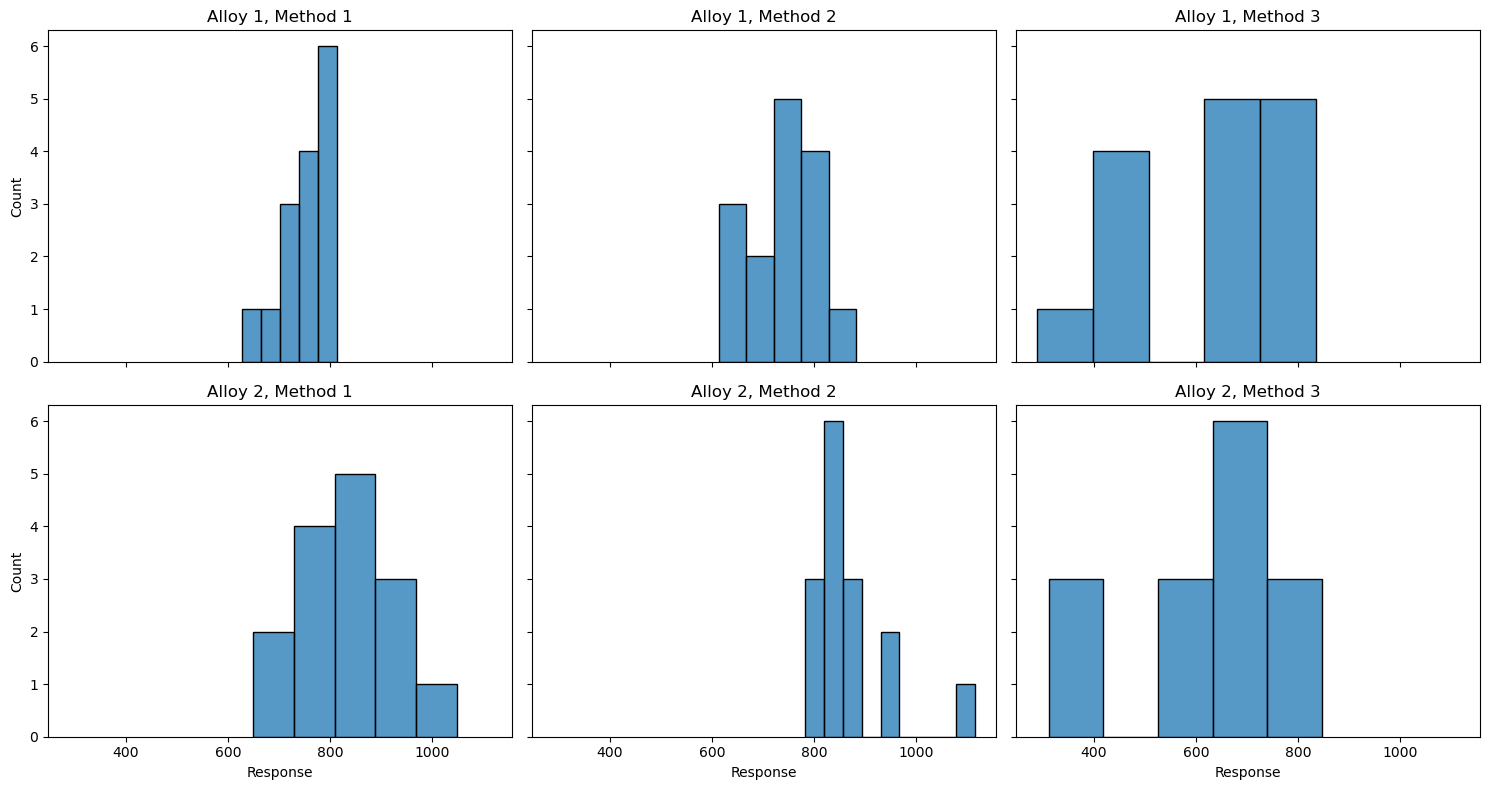

In [693]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of alloys and methods to iterate over
alloys = [1, 2]
methods = [1, 2, 3]

# Create subplots grid: len(alloys) rows and len(methods) columns
fig, axes = plt.subplots(len(alloys), len(methods), figsize=(15, 8), sharex=True, sharey=True)

# Loop through each combination of alloy and method to create histograms
for i, alloy in enumerate(alloys):
    for j, method in enumerate(methods):
        ax = axes[i, j]  # Select the appropriate subplot axis
        sns.histplot(df[(df['Alloy'] == alloy) & (df['Method'] == method)], x='Response', ax=ax)
        ax.set_title(f'Alloy {alloy}, Method {method}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [697]:

from scipy.stats import levene
print(levene(*[alloy_1['Response'][alloy_1['Method'] == i] for i in range(1, 4)])) #the * operator effectively "spreads out" the elements of the list as individual arguments
print(levene(*[alloy_2['Response'][alloy_2['Method'] == i] for i in range(1, 4)]))
print(len(df['Dentist'].unique()))

LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)
LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)
5


In [630]:
formula = 'Response ~ C(Method)'
model=ols(formula,alloy_1).fit()
print(anova_lm(model))
formula = 'Response ~ C(Method)'
model=ols(formula,alloy_2).fit()
print(anova_lm(model))



             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN
             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [631]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(alloy_1['Response'], groups=alloy_1['Method'], alpha=0.05)
print(tukey_results)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(alloy_2['Response'], groups=alloy_2['Method'], alpha=0.05)
print(tukey_results)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


## 4.3  

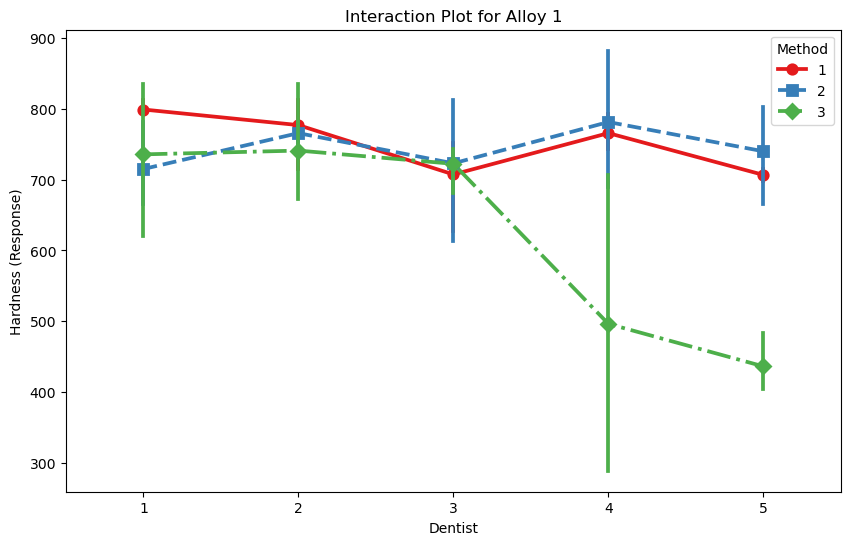

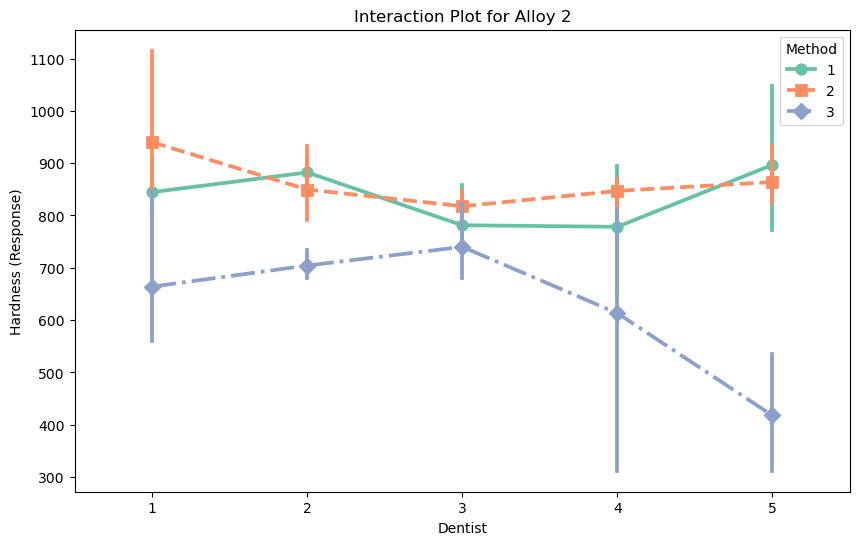

In [633]:

# Separate data for Alloy 1 and Alloy 2
alloy_1 = df[df['Alloy'] == 1]
alloy_2 = df[df['Alloy'] == 2]

# Create an interaction plot for Alloy 1
plt.figure(figsize=(10, 6))
sns.pointplot(data=alloy_1, x='Dentist', y='Response', hue='Method', palette='Set1', markers=["o", "s", "D"], linestyles=["-", "--", "-."])
plt.title('Interaction Plot for Alloy 1')
plt.ylabel('Hardness (Response)')
plt.savefig('Downloads/7.jpg')

# Create an interaction plot for Alloy 2
plt.figure(figsize=(10, 6))
sns.pointplot(data=alloy_2, x='Dentist', y='Response', hue='Method', palette='Set2', markers=["o", "s", "D"], linestyles=["-", "--", "-."])
plt.title('Interaction Plot for Alloy 2')
plt.ylabel('Hardness (Response)')

plt.savefig('Downloads/8.jpg')

In [634]:
model = ols('Response ~  C(Dentist) * C(Method)',data =alloy_1).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Dentist),106683.688889,4.0,3.899638,0.011484
C(Method),148472.177778,2.0,10.854287,0.000284
C(Dentist):C(Method),185941.377778,8.0,3.398383,0.006793
Residual,205180.000000,30.0,NaN,NaN


In [635]:
model = ols('Response ~  C(Dentist) * C(Method)',data =alloy_2).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Dentist),56797.911111,4.0,1.106152,0.371833
C(Method),499640.400000,2.0,19.461218,0.000004
C(Dentist):C(Method),197459.822222,8.0,1.922787,0.093234
Residual,385104.666667,30.0,NaN,NaN


# 4.4

In [637]:
model = ols('Response ~ C(Dentist) + C(Method)',data=alloy_1).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Dentist),106683.688889,4.0,2.591255,0.051875
C(Method),148472.177778,2.0,7.212522,0.002211
Residual,391121.377778,38.0,NaN,NaN


In [638]:
model = ols('Response ~ C(Dentist) + C(Method)',data=alloy_2).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Dentist),56797.911111,4.0,0.926215,0.458933
C(Method),499640.400000,2.0,16.295479,0.000008
Residual,582564.488889,38.0,NaN,NaN


In [639]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined interaction factor with Dentist and Method
alloy_1['Dentist_Method'] = alloy_1[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)

# Perform Tukey HSD with the combined Dentist and Method interaction
tukey_result = pairwise_tukeyhsd(alloy_1['Response'], groups=alloy_1['Dentist_Method'], alpha=0.05)

# Print the result
print(tukey_result)
print(type(tukey_result))
alloy_1['Dentist_Method'].unique()

C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\730709400.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alloy_1['Dentist_Method'] = alloy_1[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)
C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\730709400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alloy_1['Dentist_Method'] = alloy_1[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
 D1_M1  D1_M2     -84.0 0.9933 -332.8283  164.8283  False
 D1_M1  D1_M3  -63.3333 0.9996 -312.1617   185.495  False
 D1_M1  D2_M1     -22.0    1.0 -270.8283  226.8283  False
 D1_M1  D2_M2  -33.3333    1.0 -282.1617   215.495  False
 D1_M1  D2_M3     -58.0 0.9999 -306.8283  190.8283  False
 D1_M1  D3_M1  -91.6667 0.9853  -340.495  157.1617  False
 D1_M1  D3_M2     -76.0 0.9975 -324.8283  172.8283  False
 D1_M1  D3_M3  -76.6667 0.9972  -325.495  172.1617  False
 D1_M1  D4_M1  -33.3333    1.0 -282.1617   215.495  False
 D1_M1  D4_M2  -17.6667    1.0  -266.495  231.1617  False
 D1_M1  D4_M3 -302.6667  0.007  -551.495  -53.8383   True
 D1_M1  D5_M1  -92.3333 0.9844 -341.1617   156.495  False
 D1_M1  D5_M2     -59.0 0.9998 -307.8283  189.8283  False
 D1_M1  D5_M3 -362.6667 0.0007  -611.495 -113.8383   True
 D1_M2  D1_M3 

array(['D1_M1', 'D1_M2', 'D1_M3', 'D2_M1', 'D2_M2', 'D2_M3', 'D3_M1',
       'D3_M2', 'D3_M3', 'D4_M1', 'D4_M2', 'D4_M3', 'D5_M1', 'D5_M2',
       'D5_M3'], dtype=object)

In [703]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined interaction factor with Dentist and Method
alloy_2['Dentist_Method'] = alloy_2[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)

# Perform Tukey HSD with the combined Dentist and Method interaction
tukey_result = pairwise_tukeyhsd(alloy_2['Response'], groups=alloy_2['Dentist_Method'], alpha=0.05)

# Print the result
print(tukey_result)
print(type(tukey_result))

C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\1856435496.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alloy_2['Dentist_Method'] = alloy_2[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)
C:\Users\sangr\AppData\Local\Temp\ipykernel_16432\1856435496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alloy_2['Dentist_Method'] = alloy_2[['Dentist', 'Method']].apply(lambda x: f'D{x[0]}_M{x[1]}', axis=1)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
 D1_M1  D1_M2   95.3333  0.999 -245.5625  436.2292  False
 D1_M1  D1_M3 -180.6667 0.8085 -521.5625  160.2292  False
 D1_M1  D2_M1   37.6667    1.0 -303.2292  378.5625  False
 D1_M1  D2_M2       5.0    1.0 -335.8958  345.8958  False
 D1_M1  D2_M3 -140.3333 0.9635 -481.2292  200.5625  False
 D1_M1  D3_M1  -63.3333    1.0 -404.2292  277.5625  False
 D1_M1  D3_M2     -27.0    1.0 -367.8958  313.8958  False
 D1_M1  D3_M3 -104.6667 0.9973 -445.5625  236.2292  False
 D1_M1  D4_M1  -66.3333    1.0 -407.2292  274.5625  False
 D1_M1  D4_M2    2.3333    1.0 -338.5625  343.2292  False
 D1_M1  D4_M3 -231.3333 0.4686 -572.2292  109.5625  False
 D1_M1  D5_M1      52.0    1.0 -288.8958  392.8958  False
 D1_M1  D5_M2   19.3333    1.0 -321.5625  360.2292  False
 D1_M1  D5_M3    -427.0 0.0049 -767.8958  -86.1042   True
 D1_M2  D1_M3 